#**Breast Cancer Detection**
---



**About Dataset:**
>Dataset source: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.
n the 3-dimensional space is that described in:
[K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

**Attribute Information:**

* 1) ID number
* 2) Diagnosis (M = malignant, B = benign)

* 3-32)
Ten real-valued features are computed for each cell nucleus:

 * a) radius (mean of distances from center to points on the perimeter)
 * b) texture (standard deviation of gray-scale values)
 * c) perimeter
 * d) area
 * e) smoothness (local variation in radius lengths)
 * f) compactness (perimeter^2 / area - 1.0)
 * g) concavity (severity of concave portions of the contour)
 * h) concave points (number of concave portions of the contour)
 * i) symmetry
 * j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance,field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

## 1. Data preprocessing

### Importing the libraries


In [422]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization

#to ignore the warnings
import warnings
warnings.filterwarnings("ignore")

### Loading the data

In [423]:
data = pd.read_csv('data.csv')

### Data exploration

In [424]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [425]:
data.shape

(569, 33)

In [426]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [427]:
data.drop(['Unnamed: 32', 'id'], axis=1, inplace=True)

In [428]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [429]:
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [430]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Dealing with the missing data

In [431]:
data.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

### Encoding the categorical data

In [432]:
data.select_dtypes(include='object').columns

Index(['diagnosis'], dtype='object')

In [433]:
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [434]:
data['diagnosis'].nunique()

2

In [435]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [436]:
data['diagnosis'] = data['diagnosis'].apply(lambda val: 1 if val == 'M' else 0)

In [437]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [438]:
data.shape

(569, 31)

In [439]:
data = pd.get_dummies(data=data, drop_first=True)

In [440]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [441]:
data.shape

(569, 31)

### Hist Plot

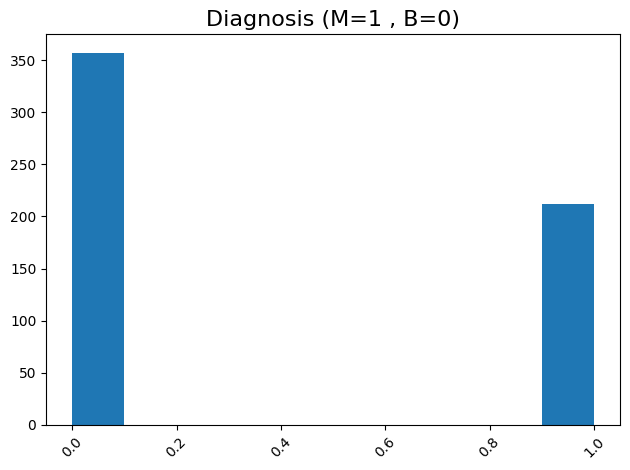

In [442]:
plt.hist(data['diagnosis'])

plt.title('Diagnosis (M=1 , B=0)', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.tight_layout()
plt.show()

In [443]:
# benign (B) values
(data.diagnosis == 0).sum()

357

In [444]:
# malignant (M) values
(data.diagnosis == 1).sum()

212

### Correlation matrix and Heatmap

In [445]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [446]:
data['diagnosis'].dtype

dtype('int64')

In [447]:
data_2 = data.drop(columns='diagnosis')

<Axes: title={'center': 'Correlation with diagnosis'}>

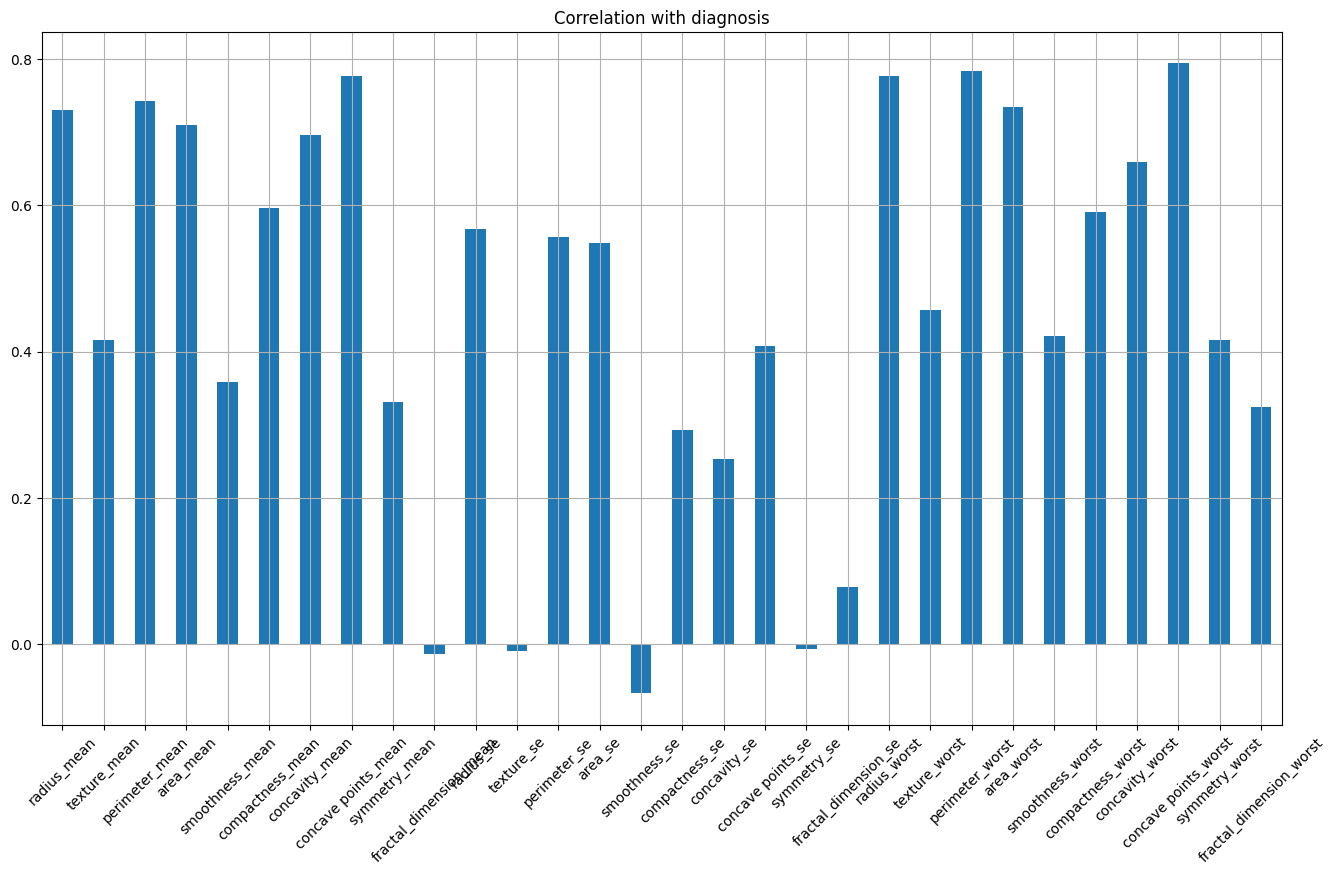

In [448]:
data_2.corrwith(data['diagnosis']).plot.bar(
    figsize=(16,9), title = 'Correlation with diagnosis',
    rot = 45, grid = True
)

In [449]:
# Create Correlation Matrix
corr_matrix = data.corr()
corr_matrix

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


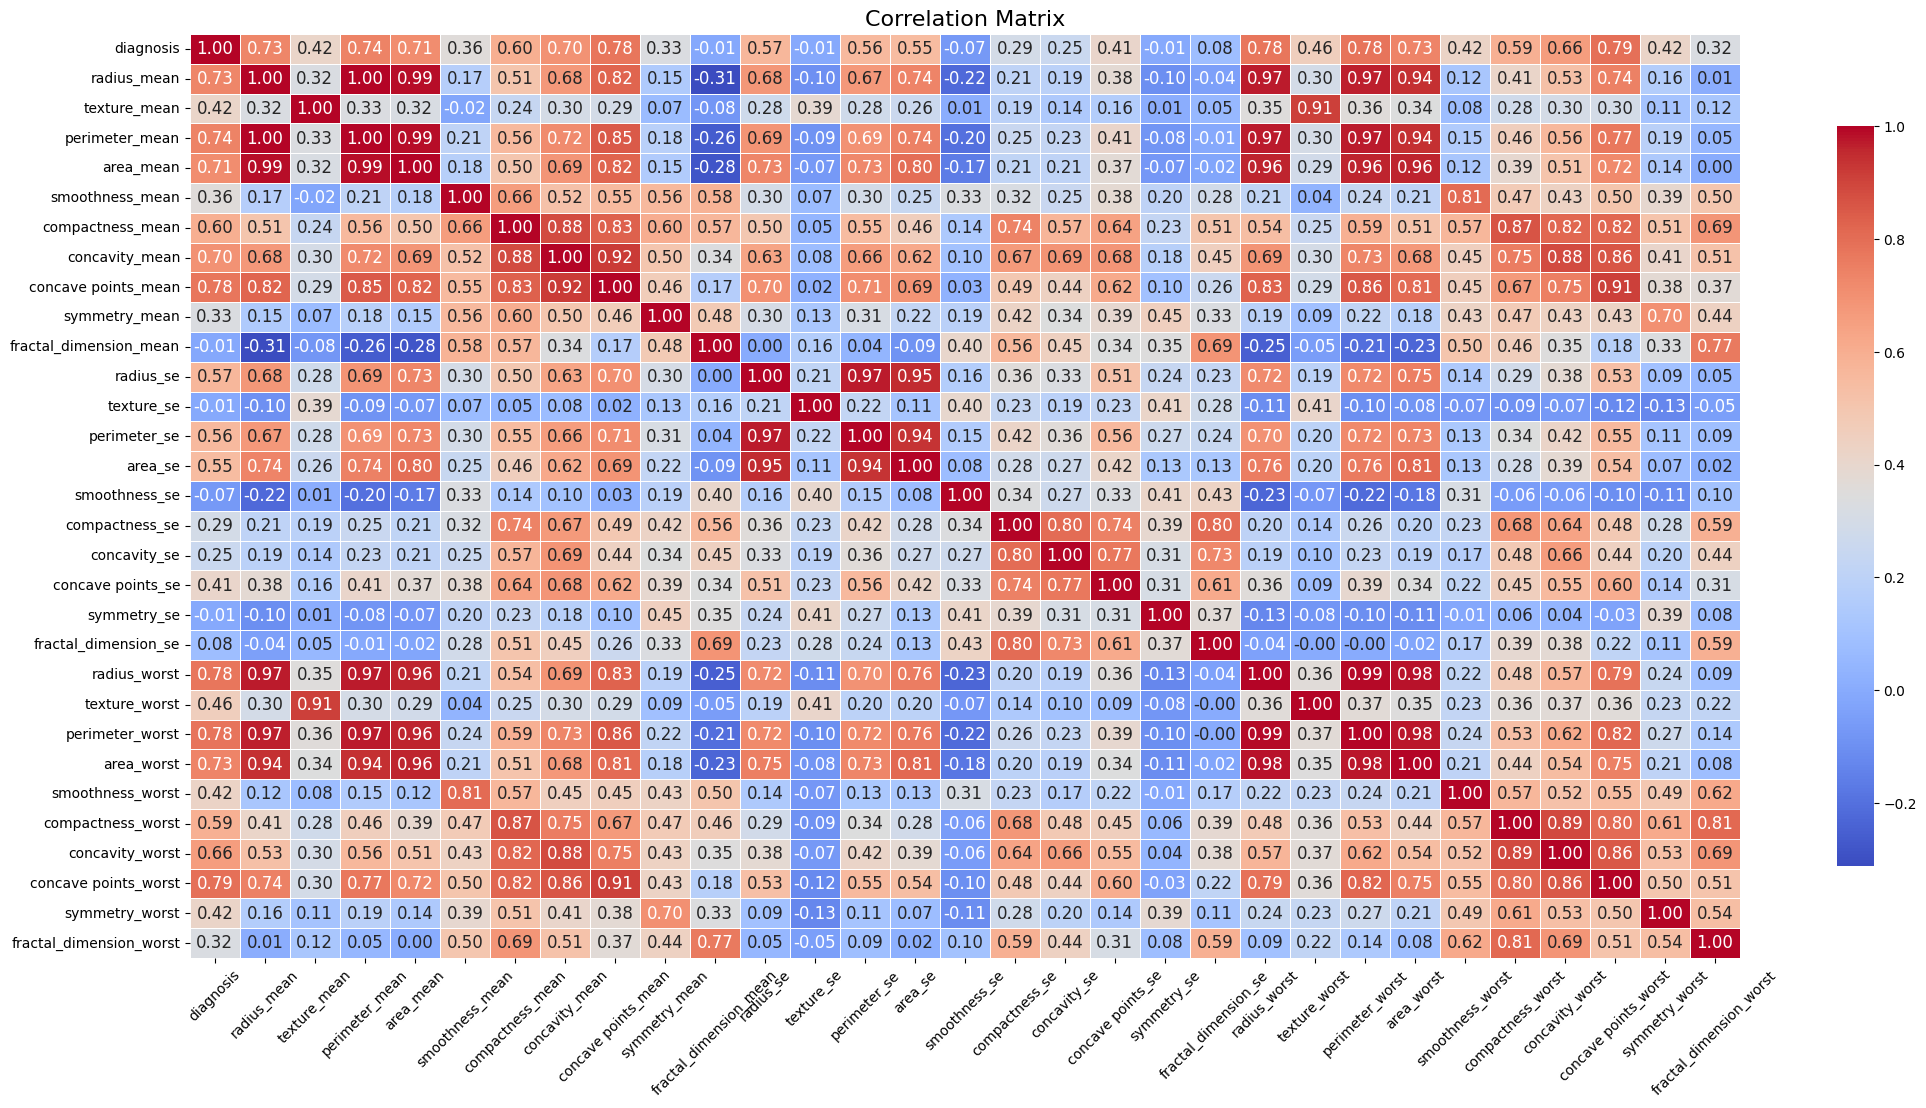

In [450]:
# Let's make a heatmap

plt.figure(figsize=(25, 12))
sns.heatmap(corr_matrix,
            annot=True,
            linewidths=0.5,
            fmt=".2f",
            cmap="coolwarm",  # Change the colormap to 'coolwarm' for better visual contrast
            annot_kws={"size": 12},  # Adjust the size of the annotations
            cbar_kws={"shrink": 0.8})  # Shrink the color bar to make it less dominant

plt.title('Correlation Matrix', fontsize=16)  # Add a title to the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=0)   # Keep y-axis labels horizontal

plt.show()

### Splitting the dataset into train and test set

In [451]:
X=data.drop(["diagnosis"], axis=1)
y=data["diagnosis"]

In [452]:
X.shape

(569, 30)

In [453]:
y.shape

(569,)

In [454]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [455]:
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Training labels size: {y_train.shape[0]} samples")
print(f"Testing labels size: {y_test.shape[0]} samples")

Training set size: 455 samples
Testing set size: 114 samples
Training labels size: 455 samples
Testing labels size: 114 samples


### Feature scaling

In [456]:
from sklearn.preprocessing import StandardScaler

In [457]:
# Initialize the StandardScaler
scaler = StandardScaler()

In [458]:
X_train = scaler.fit_transform(X_train)

In [459]:
X_test = scaler.transform(X_test)

In [460]:
X_train

array([[-1.44075296, -0.43531947, -1.36208497, ...,  0.9320124 ,
         2.09724217,  1.88645014],
       [ 1.97409619,  1.73302577,  2.09167167, ...,  2.6989469 ,
         1.89116053,  2.49783848],
       [-1.39998202, -1.24962228, -1.34520926, ..., -0.97023893,
         0.59760192,  0.0578942 ],
       ...,
       [ 0.04880192, -0.55500086, -0.06512547, ..., -1.23903365,
        -0.70863864, -1.27145475],
       [-0.03896885,  0.10207345, -0.03137406, ...,  1.05001236,
         0.43432185,  1.21336207],
       [-0.54860557,  0.31327591, -0.60350155, ..., -0.61102866,
        -0.3345212 , -0.84628745]])

In [461]:
X_test

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

## 2. Building the model

### Logistic regression

#### Logistic regression Model building

In [462]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1])

#### Evaluation_scores for Logistic Regression Model

In [463]:
# Evaluation Scores
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Print confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")
print("_______________________________________________")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {conf_matrix}")
print("_______________________________________________")

# Print classification report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

Accuracy Score: 0.97
_______________________________________________
Confusion Matrix:
 [[70  1]
 [ 2 41]]
_______________________________________________
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#### Cross Validation for Logistic Regression

In [464]:
# Cross-validation Function
from sklearn.model_selection import cross_val_score

# Perform cross-validation
scores = cross_val_score(estimator=log_reg, X=X_train, y=y_train, cv=10)

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores:\n{scores}")
print("_______________________________________________")
print(f"Mean Accuracy: {scores.mean():.2f}")
print("_______________________________________________")
print(f"Standard Deviation: {scores.std():.2f}")

Cross-Validation Accuracy Scores:
[0.97826087 0.97826087 0.97826087 0.95652174 1.         1.
 0.97777778 0.97777778 0.95555556 0.93333333]
_______________________________________________
Mean Accuracy: 0.97
_______________________________________________
Standard Deviation: 0.02


#### ROC curve and calculate AUC Function

AUC: 1.00


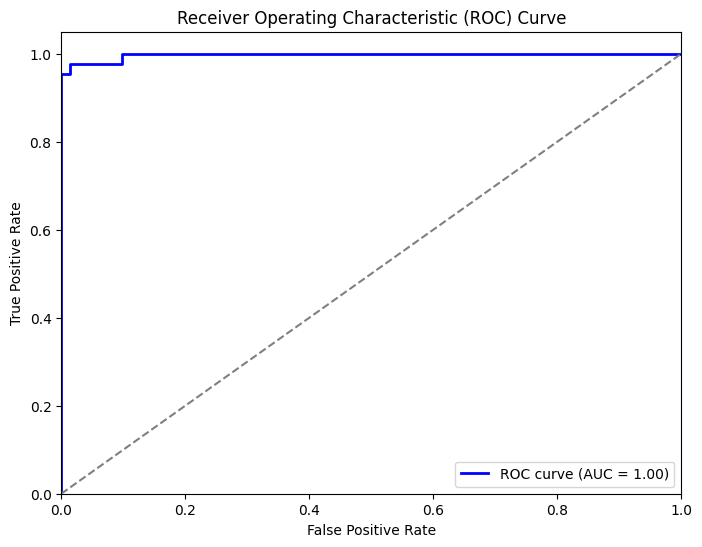

In [465]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities for the positive class
y_score = log_reg.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Print AUC
print(f"AUC: {roc_auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Random Forest Algorithm

#### Random Forest Algorithm model building

In [466]:
from sklearn.ensemble import RandomForestClassifier

# Create Random Forest classifier object
random_forest = RandomForestClassifier(random_state=42)

random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1])

#### Evaluation_scores for Random Forest Model

In [467]:
# Evaluation Scores
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Print confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")
print("_______________________________________________")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {conf_matrix}")
print("_______________________________________________")

# Print classification report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

Accuracy Score: 0.96
_______________________________________________
Confusion Matrix:
 [[70  1]
 [ 3 40]]
_______________________________________________
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



#### Cross Validation for Random Forest Algorithm

In [468]:
# Perform cross-validation
scores = cross_val_score(estimator=random_forest, X=X_train, y=y_train, cv=10)

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores:\n{scores}")
print("_______________________________________________")
print(f"Mean Accuracy: {scores.mean():.2f}")
print("_______________________________________________")
print(f"Standard Deviation: {scores.std():.2f}")

Cross-Validation Accuracy Scores:
[1.         0.95652174 0.97826087 0.91304348 0.97826087 0.97777778
 0.95555556 0.93333333 0.97777778 0.95555556]
_______________________________________________
Mean Accuracy: 0.96
_______________________________________________
Standard Deviation: 0.02


#### ROC curve and calculate AUC Function

AUC: 1.00


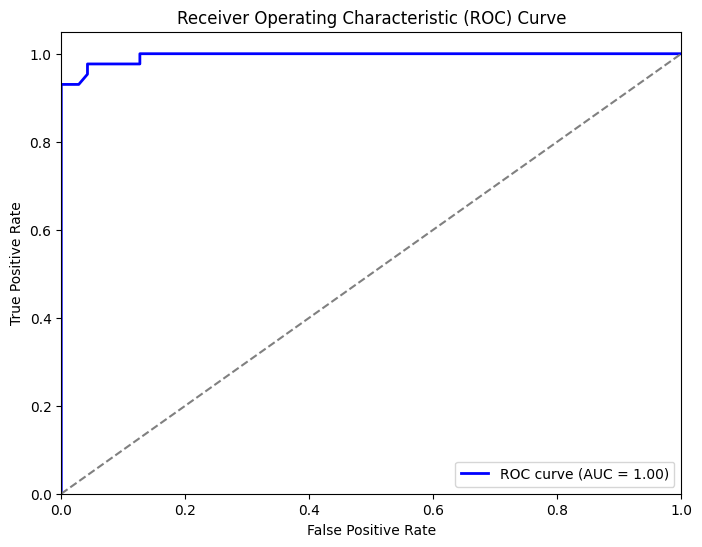

In [469]:
# Get predicted probabilities for the positive class
y_score = random_forest.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Print AUC
print(f"AUC: {roc_auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### XGBoost Classifer Model

#### XGBoost Model Building

In [470]:
from xgboost import XGBClassifier

# Create XGBoost classifier object
xgb = XGBClassifier()

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1])

#### Evaluation_scores for XGBoost

In [471]:
# Evaluation Scores
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Print confusion matrix
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")
print("_______________________________________________")

# Print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n {conf_matrix}")
print("_______________________________________________")

# Print classification report
class_report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{class_report}")

Accuracy Score: 0.96
_______________________________________________
Confusion Matrix:
 [[69  2]
 [ 3 40]]
_______________________________________________
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



#### Cross Validation for XGBoost

In [472]:
# Perform cross-validation
scores = cross_val_score(estimator=xgb, X=X_train, y=y_train, cv=10)

# Print cross-validation results
print(f"Cross-Validation Accuracy Scores:\n{scores}")
print("_______________________________________________")
print(f"Mean Accuracy: {scores.mean():.2f}")
print("_______________________________________________")
print(f"Standard Deviation: {scores.std():.2f}")

Cross-Validation Accuracy Scores:
[0.97826087 0.95652174 1.         0.93478261 1.         0.97777778
 0.97777778 0.95555556 0.97777778 0.93333333]
_______________________________________________
Mean Accuracy: 0.97
_______________________________________________
Standard Deviation: 0.02


#### ROC curve and calculate AUC Function

AUC: 0.99


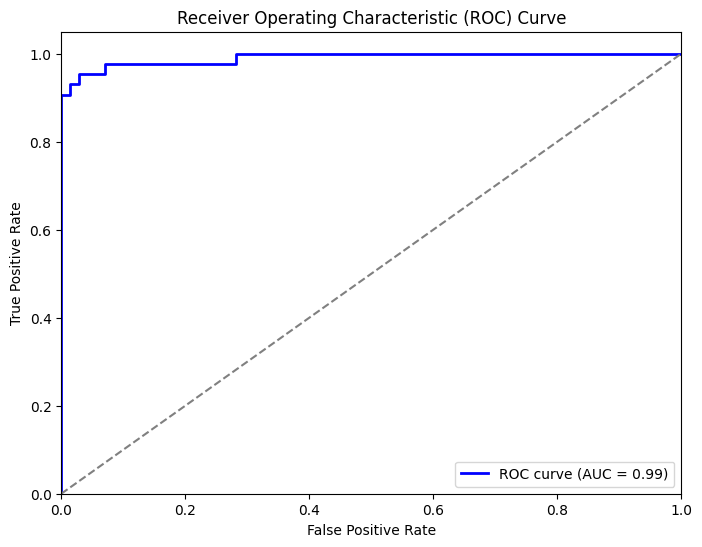

In [473]:
# Get predicted probabilities for the positive class
y_score = xgb.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Print AUC
print(f"AUC: {roc_auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 3. Hyperparameter Optimization (RandomizedSearchCV)

### Logistic Regression

In [474]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Define hyperparameters and values to tune
param_dist ={'penalty':['l1', 'l2', 'elasticnet', 'none'],
             'C': uniform(loc=0, scale=4),
              'C':[0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
             }


# Create RandomizedSearchCV
random_search_lr = RandomizedSearchCV(log_reg, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV
random_search_lr.fit(X_train, y_train)

# Get best parameters
print("Best Parameters for Logistic Regression:", random_search_lr.best_params_)

Best Parameters for Logistic Regression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.25}


In [475]:
# Evaluate Logistic Regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr_best = random_search_lr.best_estimator_

lr_predictions = lr_best.predict(X_test)

lr_accuracy = accuracy_score(y_test, lr_predictions)
print("Logistic Regression Accuracy:", lr_accuracy)

lr_precision = precision_score(y_test, lr_predictions)
print("Logistic Regression precision:", lr_precision)

lr_recall = recall_score(y_test, lr_predictions)
print("Logistic Regression recall:", lr_recall)

lr_f1 = f1_score(y_test, lr_predictions)
print("Logistic Regression f1_score:", lr_f1)

Logistic Regression Accuracy: 0.9736842105263158
Logistic Regression precision: 0.9545454545454546
Logistic Regression recall: 0.9767441860465116
Logistic Regression f1_score: 0.9655172413793104


AUC: 1.00


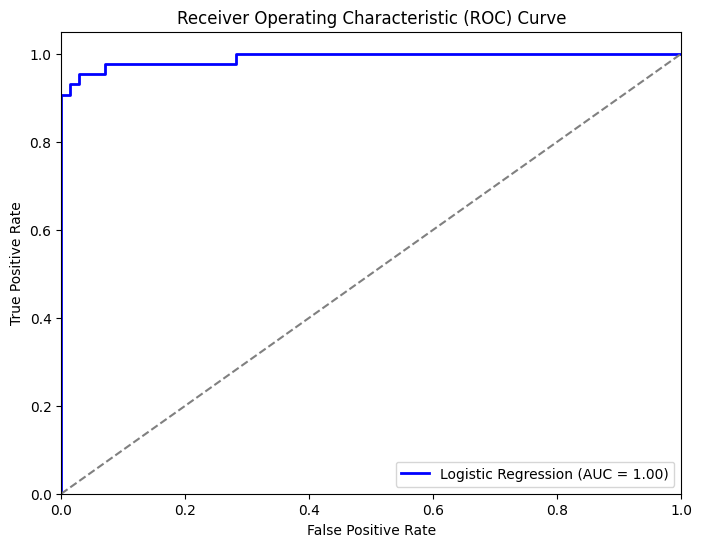

In [498]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
lr_probs = lr_best.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
lr_auc = roc_auc_score(y_test, lr_probs)
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_probs)

# Print AUC
print(f"AUC: {lr_auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % lr_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Random Forest Algorithm

In [476]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions
param_dist = {
    'n_estimators': randint(100, 1000),  # Number of trees in the forest
    'max_depth': [None] + list(randint(1, 100).rvs(10)),  # Maximum depth of the trees
    'min_samples_split': randint(2, 20),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20)  # Minimum number of samples required to be at a leaf node
}


# Create RandomizedSearchCV
random_search_rf = RandomizedSearchCV(random_forest, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV
random_search_rf.fit(X_train, y_train)

# Get best parameters
print("Best Parameters for Random Forest:", random_search_rf.best_params_)


Best Parameters for Random Forest: {'max_depth': 39, 'min_samples_leaf': 4, 'min_samples_split': 9, 'n_estimators': 763}


In [477]:
# Evaluate Random Forest
rf_best = random_search_rf.best_estimator_

rf_predictions = rf_best.predict(X_test)

rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

rf_precision = precision_score(y_test, rf_predictions)
print("Random Forest precision:", rf_precision)

rf_recall = recall_score(y_test, rf_predictions)
print("Random Forest recall:", rf_recall)

rf_f1 = f1_score(y_test, rf_predictions)
print("Random Forest f1_score:", rf_f1)

Random Forest Accuracy: 0.9649122807017544
Random Forest precision: 0.975609756097561
Random Forest recall: 0.9302325581395349
Random Forest f1_score: 0.9523809523809524


AUC: 1.00


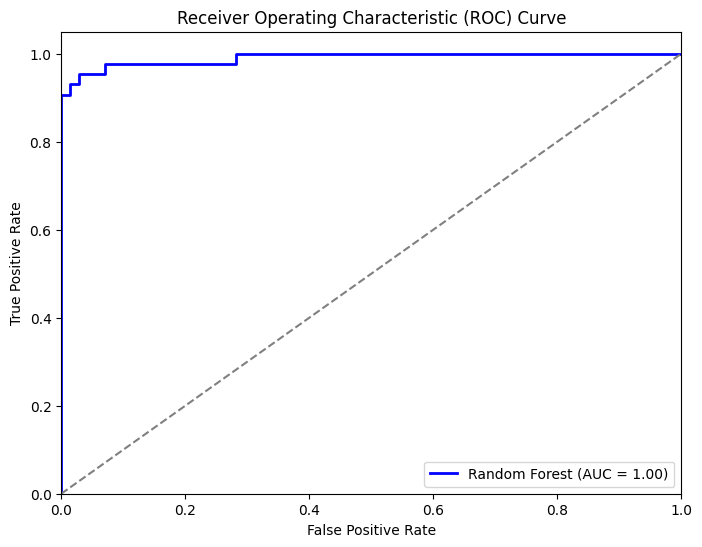

In [499]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
rf_probs = rf_best.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
rf_auc = roc_auc_score(y_test, rf_probs)
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_probs)

# Print AUC
print(f"AUC: {rf_auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### XGBoost with RandomizedSearchCV

In [478]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

# Define the parameter distributions
param_dist = {
    'learning_rate': uniform(0.01, 0.3),  # Learning rate
    'max_depth': randint(3, 10),  # Maximum depth of the trees
    'min_child_weight': randint(1, 10),  # Minimum sum of instance weight needed in a child
    'subsample': uniform(0.6, 0.4),  # Subsample ratio of the training instance
    'colsample_bytree': uniform(0.6, 0.4)  # Subsample ratio of columns when constructing each tree
}

# Create XGBoost model
xgb = XGBClassifier()

# Create RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', random_state=42)

# Fit RandomizedSearchCV
random_search_xgb.fit(X_train, y_train)

# Get best parameters
print("Best Parameters for XGBoost:", random_search_xgb.best_params_)


Best Parameters for XGBoost: {'colsample_bytree': 0.6987504251354405, 'learning_rate': 0.21889128185193651, 'max_depth': 5, 'min_child_weight': 1, 'subsample': 0.6592347719813599}


In [479]:
# Evaluate XGBoost
xgb_best = random_search_xgb.best_estimator_
xgb_predictions = xgb_best.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)

xgb_precision = precision_score(y_test, xgb_predictions)
print("XGBoost precision:", xgb_precision)

xgb_recall = recall_score(y_test, xgb_predictions)
print("XGBoost recall:", xgb_recall)

xgb_f1 = f1_score(y_test, xgb_predictions)
print("XGBoost f1_score:", xgb_f1)

XGBoost Accuracy: 0.9649122807017544
XGBoost precision: 0.975609756097561
XGBoost recall: 0.9302325581395349
XGBoost f1_score: 0.9523809523809524


AUC: 0.98


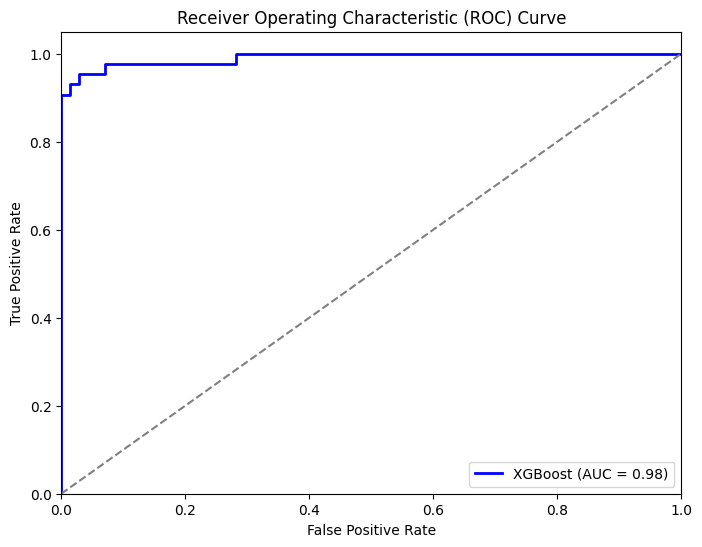

In [500]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get predicted probabilities for the positive class
xgb_probs = xgb_best.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
xgb_auc = roc_auc_score(y_test, xgb_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)

# Print AUC
print(f"AUC: {xgb_auc:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='XGBoost (AUC = %0.2f)' % xgb_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## 4. Result:

In [489]:
# lr_best, rf_best, and xgb_best are the best models obtained after hyperparameter tuning

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [lr_accuracy, rf_accuracy, xgb_accuracy],
    'Precision': [lr_precision, rf_precision, xgb_precision],
    'Recall': [lr_recall, rf_recall, xgb_recall],
    'F1-score': [lr_f1, rf_f1, xgb_f1]
})

# Round the values in the DataFrame to two decimal places
results_df = results_df.round(2)

# Define a function to highlight the maximum value in each column
def highlight_max_low_contrast(s):
    is_max = s == s.max()
    color = 'background-color: rgba(255, 255, 0, 0.3)'  # Yellow with 30% opacity
    return [color if v else '' for v in is_max]

# Apply the highlighting function to the DataFrame
styled_results_df = results_df.style.apply(highlight_max_low_contrast, subset=['Accuracy', 'Precision', 'Recall', 'F1-score'])

# Display the results
print("Model Comparison Results after Hyperparameter Tuning:")
styled_results_df

Model Comparison Results after Hyperparameter Tuning:


,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.970000,0.950000,0.980000,0.970000
1,Random Forest,0.960000,0.980000,0.930000,0.950000
2,XGBoost,0.960000,0.980000,0.930000,0.950000


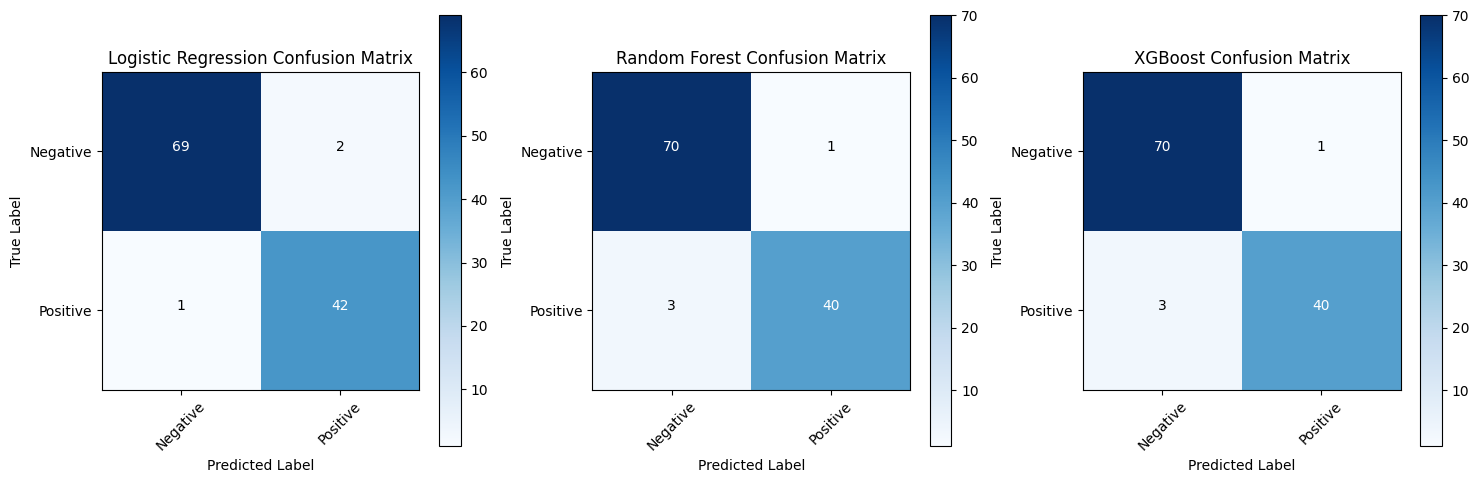

In [493]:
import itertools
from sklearn.metrics import confusion_matrix

# Define a function to plot confusion matrix with annotations
def plot_confusion_matrix(cm, title):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

# Define the classes (e.g., 'negative' and 'positive')
classes = ['Negative', 'Positive']

# Plot confusion matrices for each model
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
lr_cm = confusion_matrix(y_test, lr_predictions)
plot_confusion_matrix(lr_cm, title='Logistic Regression Confusion Matrix')

plt.subplot(1, 3, 2)
rf_cm = confusion_matrix(y_test, rf_predictions)
plot_confusion_matrix(rf_cm, title='Random Forest Confusion Matrix')

plt.subplot(1, 3, 3)
xgb_cm = confusion_matrix(y_test, xgb_predictions)
plot_confusion_matrix(xgb_cm, title='XGBoost Confusion Matrix')

plt.show()


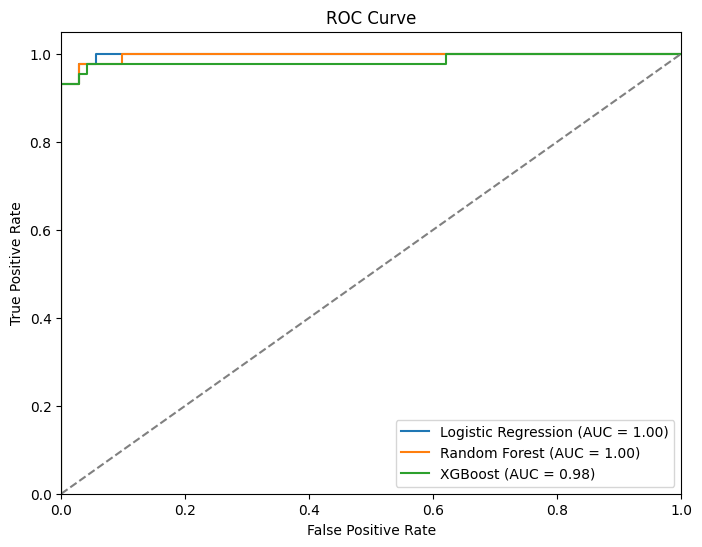

In [501]:
from sklearn.metrics import roc_curve, roc_auc_score

# Define a function to plot ROC curve and calculate AUC
def plot_roc_curve(model_name, y_true, y_probs):
    fpr, tpr, thresholds = roc_curve(y_true, y_probs)
    auc_score = roc_auc_score(y_true, y_probs)

    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (model_name, auc_score))

# Plot ROC curves for each model
plt.figure(figsize=(8, 6))

# Logistic Regression
plot_roc_curve('Logistic Regression', y_test, lr_probs)

# Random Forest
plot_roc_curve('Random Forest', y_test, rf_probs)

# XGBoost
plot_roc_curve('XGBoost', y_test, xgb_probs)

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## 5. Conclusion


- **Dataset Overview:**
  - The dataset originates from Kaggle and the UCI Machine Learning Repository, featuring characteristics of cell nuclei extracted from fine needle aspirate (FNA) images.
  - It comprises ten real-valued features per cell nucleus, including radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.
  - The data includes 357 benign and 212 malignant cases.

- **Model Performance Comparison after Hyperparameter Tuning:**
  - Logistic Regression achieved an accuracy of 97.37%, precision of 95.45%, recall of 97.67%, and F1-score of 96.55%.
  - Random Forest achieved an accuracy of 96.49%, precision of 97.56%, recall of 93.02%, and F1-score of 95.24%.
  - XGBoost achieved an accuracy of 96.49%, precision of 97.56%, recall of 93.02%, and F1-score of 95.24%.

- **Key Observations:**
  - **Logistic Regression** demonstrates the highest recall, indicating its effectiveness in identifying malignant cases.
  - **Random Forest** and **XGBoost** exhibit superior precision, suggesting their proficiency in correctly classifying positive cases.
  - All models showcase robust performance in distinguishing between benign and malignant cases.

- **Recommendations:**
  - For applications prioritizing sensitivity in detecting malignancy, **Logistic Regression** offers a suitable choice due to its high recall.
  - **Random Forest** and **XGBoost** may be preferred when precision is of utmost importance.
  - Further validation and clinical assessment are warranted to determine the most appropriate model for specific diagnostic scenarios.

**These results suggest that Logistic Regression may be preferable if maximizing recall is crucial, while Random Forest and XGBoost offer higher precision.**